In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy 
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

In [5]:
import csv

f = open("C:/Users/kowm6/OneDrive/바탕 화면/당뇨.csv",'r')
dataset = numpy.loadtxt(f, delimiter=",")

ValueError: could not convert string to float: 'Pregnancies'

In [6]:
import csv

# f = pd.read_csv("C:/Users/kowm6/OneDrive/바탕 화면/당뇨병data.csv",'r')
    
f = open("C:/Users/kowm6/OneDrive/바탕 화면/당뇨.csv",'r')
dataset = numpy.loadtxt(f, delimiter=",")

ValueError: could not convert string to float: 'Pregnancies'

### 생각해볼점 1
- 위의 Neural Network Approximation을 5회 실시해 본 결과가 다음과 같다.
- 왜 당뇨병일 확률이 매번 다르게 나타났을 까?
1회: [[41.567825]]<br>
2회: [[16.19133]]<br>
3회: [[37.305862]]<br>
4회: [[12.078306]]<br>
5회: [[28.263702]]

24/24 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8307

accuracy: 83.07%
24/24 [==============================] - 0s 941us/step - loss: 0.3426 - accuracy: 0.8477

accuracy: 84.77%
24/24 [==============================] - 0s 981us/step - loss: 0.2962 - accuracy: 0.8633

accuracy: 86.33%
24/24 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8372

accuracy: 83.72%
24/24 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8620

accuracy: 86.20%


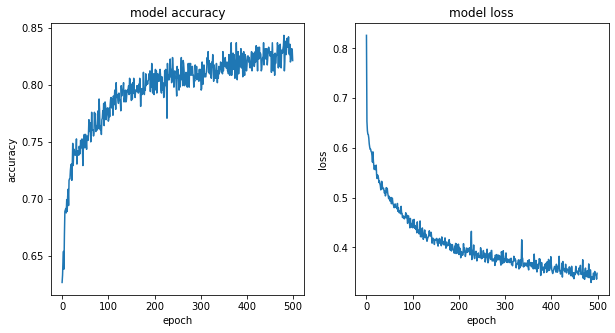

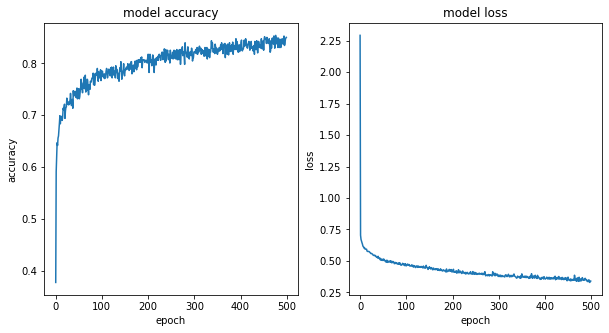

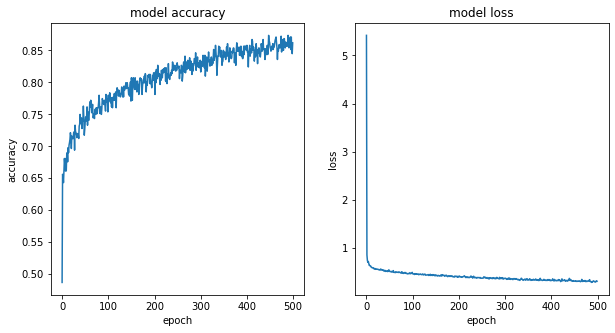

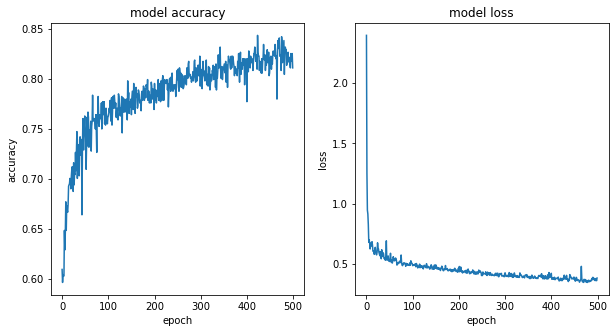

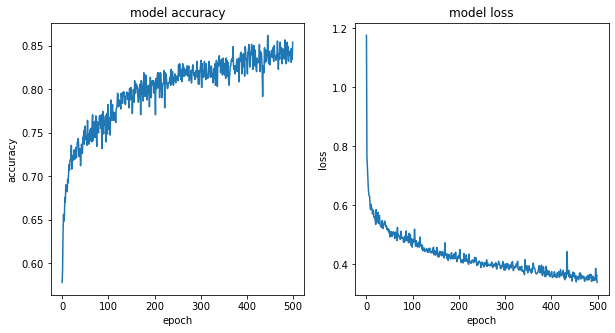

In [4]:
X = dataset[:,0:8]
Y = dataset[:,8]

for i in range(5):
    # create model, add dense layers one by one specifying activation function
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu')) # input layer requires input_dim param
    model.add(Dense(15, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

    # compile the model, adam gradient descent (optimized)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

    # call the function to fit to the data (training the network)
    # verbose=0 는 프로그래스를 숨깁니다.
    history = model.fit(X, Y, epochs = 500, batch_size=10, verbose=0)

    # 모델의 정확도를 계산합니다.
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    # Get the figure and the axes
    fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

    # 모델의 정확도를 그립니다.
    ax0.plot(history.history['accuracy']) 
    ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

    # 모델의 오차를 그립니다.
    ax1.plot(history.history['loss'])
    ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

- Epoch 1은 인공 신경망에서 전체 데이터셋이 forward pass,backward pass 과정을 딱 한번 거친 과정을 말한다 즉 한번 학습을 한 상태이다.

- batch size는 데이터 셋을 나누는 개념으로 100개의 데이터가 있으면 batch size가 10일 때 데이터를 10개를 10개씩 배치하여 학습 시키는 것이다.

- 위 데이터 에포크 500이며 batch size는 10이다 그러므로 각 각 모여진 데이터들이 총 500번씩 학습을 하는건데 배치 순서는 랜덤적이기 때문에 model loss 값과 model accuracy 값들이 실행시킬 때 마다 달라지는 것이다.


### 생각해볼점 2
- 학습시키기위한 epoch를 $100 \rightarrow 500$으로 증가시키면 결과는 어떻게 달라지는가?

# epoch 100

24/24 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7812

accuracy: 78.12%


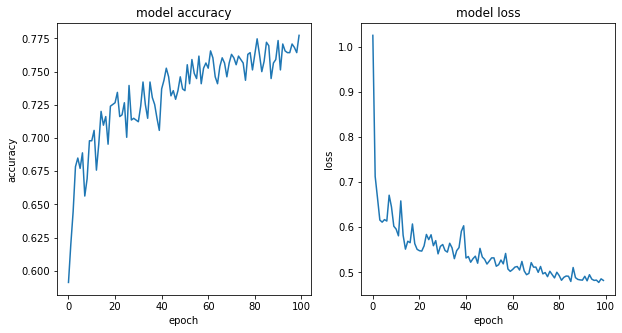

In [5]:
X = dataset[:,0:8]
Y = dataset[:,8]

for i in range(1):
    # create model, add dense layers one by one specifying activation function
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu')) # input layer requires input_dim param
    model.add(Dense(15, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

    # compile the model, adam gradient descent (optimized)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

    # call the function to fit to the data (training the network)
    # verbose=0 는 프로그래스를 숨깁니다.
    history = model.fit(X, Y, epochs = 100, batch_size=10, verbose=0)

    # 모델의 정확도를 계산합니다.
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    # Get the figure and the axes
    fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

    # 모델의 정확도를 그립니다.
    ax0.plot(history.history['accuracy']) 
    ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

    # 모델의 오차를 그립니다.
    ax1.plot(history.history['loss'])
    ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

# epoch 500

24/24 [==============================] - 0s 926us/step - loss: 0.3206 - accuracy: 0.8568

accuracy: 85.68%


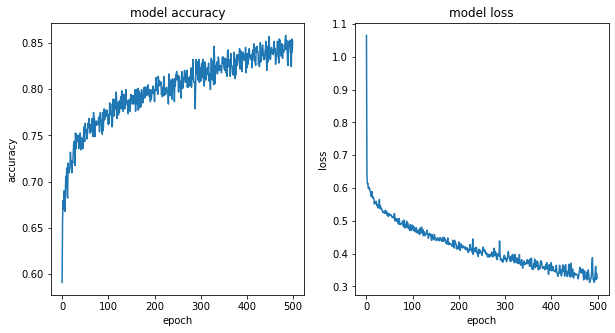

In [6]:
X = dataset[:,0:8]
Y = dataset[:,8]

for i in range(1):
    # create model, add dense layers one by one specifying activation function
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu')) # input layer requires input_dim param
    model.add(Dense(15, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

    # compile the model, adam gradient descent (optimized)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

    # call the function to fit to the data (training the network)
    # verbose=0 는 프로그래스를 숨깁니다.
    history = model.fit(X, Y, epochs = 500, batch_size=10, verbose=0)

    # 모델의 정확도를 계산합니다.
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    # Get the figure and the axes
    fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

    # 모델의 정확도를 그립니다.
    ax0.plot(history.history['accuracy']) 
    ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

    # 모델의 오차를 그립니다.
    ax1.plot(history.history['loss'])
    ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

- epoch의 차이로 인해 학습하는 횟수의 차이로 값의 결과가 다르게 나오나 그 정확한 이유에 대해서는 아직 모르겠다.

### 생각해볼점 3
- Network architecture 를 바꾸면 결과가 어떻게 달라지는가?
- 예를들면 Hidden Layer수를 줄이고 각 Hidden layer에서 node 수를 늘리는 것은 어떨까?

24/24 [==============================] - 0s 946us/step - loss: 0.2692 - accuracy: 0.8971

accuracy: 89.71%


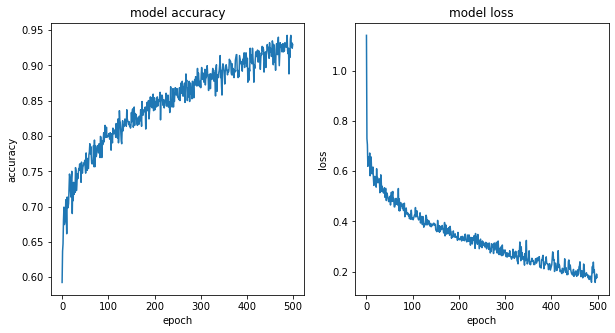

In [7]:
X = dataset[:,0:8]
Y = dataset[:,8]

for i in range(1):
    # create model, add dense layers one by one specifying activation function
    model = Sequential()
    model.add(Dense(40, input_dim=8, activation='relu')) # input layer requires input_dim param
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

    # compile the model, adam gradient descent (optimized)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

    # call the function to fit to the data (training the network)
    # verbose=0 는 프로그래스를 숨깁니다.
    history = model.fit(X, Y, epochs = 500, batch_size=10, verbose=0)

    # 모델의 정확도를 계산합니다.
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    # Get the figure and the axes
    fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

    # 모델의 정확도를 그립니다.
    ax0.plot(history.history['accuracy']) 
    ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

    # 모델의 오차를 그립니다.
    ax1.plot(history.history['loss'])
    ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

- 오히려 히든레이어 횟수를 줄이고 노드를 늘리니 정확도의 값은 전보다 향상되었다.


# XOR문제

In [10]:

import tensorflow as tf
import numpy as np

# XOR data
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

history = model.fit(x, y, epochs=3000, batch_size=1,verbose=0)

model.summary()

print(model.predict(x))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 2)                 6         
                                                                 
 dense_48 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 40ms/step
[[0.06412057]
 [0.9333982 ]
 [0.9162395 ]
 [0.07327686]]


# XOR hidden layer 10

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import numpy 
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid')) 

model.add(Dense(12, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss="BinaryCrossentropy", optimizer='adam',metrics=['accuracy'])
# tf.keras.optimizers.SGD(learning_rate=0.1)
history = model.fit(X, Y, epochs = 3000, batch_size=0, verbose=0)

model.summary()

print(model.predict(X))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
 dense_22 (Dense)            (None, 12)                36        
                                                                 
 dense_23 (Dense)            (None, 15)                195       
                                                                 
 dense_24 (Dense)            (None, 15)                240       
                                                                 
 dense_25 (Dense)            (None, 15)                240       
                                                                 
 dense_26 (Dense)            (None, 15)                240       
                                                                 
 dense_27 (Dense)            (None, 15)               